<a href="https://colab.research.google.com/github/Luiz-sj/Projeto-Final---Bootcamp-Alura-Data-Science-2021/blob/main/Cap%C3%ADtulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Seção 2.1:**

#**Regressão Logística e Métricas de Acurácia**

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

df = pd.read_csv('https://github.com/Luiz-sj/Projeto-Final---Bootcamp-Alura-Data-Science-2021/raw/main/Dados/df_treated.csv').drop(['Unnamed: 0'], axis=1)

df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_DIFF,FFA_MEDIAN,FFA_DIFF,GGT_MEDIAN,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_DIFF,HEMOGLOBIN_DIFF,...,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_DIFF,TGO_MEDIAN,TGO_DIFF,TGP_DIFF,TTPA_MEDIAN,TTPA_DIFF,UREA_MEDIAN,UREA_DIFF,DIMER_MEDIAN,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,WINDOW,ICU,ICU_norm
0,0,1,50,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.183673,-1.0,-0.868365,-1.0,-0.742004,-1.0,-0.945093,-1.0,-0.891993,-1.0,0.090147,-1.0,-1.0,...,-1.0,0.345679,-1.0,-0.028571,-1.0,-0.997201,-1.0,-1.0,-0.825613,-1.0,-0.836145,-1.0,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0,1
1,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.912243,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.780261,-1.0,0.144654,-1.0,-1.0,...,-1.0,0.345679,-1.0,0.085714,-1.0,-0.995428,-1.0,-1.0,-0.846633,-1.0,-0.836145,-1.0,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,0-2,0,1
2,3,0,30,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.972789,-1.0,-1.0,-1.0,0.326531,-1.0,-0.968861,-1.0,-0.194030,-1.0,-0.316589,-1.0,-0.891993,-1.0,-0.203354,-1.0,-1.0,...,-1.0,0.580247,-1.0,0.200000,-1.0,-0.989549,-1.0,-1.0,-0.846633,-1.0,-0.937349,-1.0,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0,0
3,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.935113,-1.0,-1.0,-1.0,0.357143,-1.0,-0.913659,-1.0,-0.829424,-1.0,-0.938084,-1.0,-0.851024,-1.0,0.358491,-1.0,-1.0,...,-1.0,0.345679,-1.0,0.142857,-1.0,-0.998507,-1.0,-1.0,-0.846633,-1.0,-0.903614,-1.0,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,0-2,0,0
4,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.891012,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.891993,-1.0,0.291405,-1.0,-1.0,...,-1.0,0.345679,-1.0,0.085714,-1.0,-0.997947,-1.0,-1.0,-0.846633,-1.0,-0.884337,-1.0,-1.000000,-1.0,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,0.030928,-0.3750,-0.401709,-0.4

#Um exemplo de aplicação de diversos modelos de machine learning na área de saúde pode ser encontrado em [3].

#Os primeiros modelos a serem treinados serão os de Regressão Logística e Árvore de Decisão através da biblioteca `sklearn` do Python. São modelos adequados ao chamado problema de classificação, que são aqueles utilizados para resolver problemas binários, ou seja aqueles que a resposta é positiva ou negativa (no atual problema, os valores positivos são aqueles em que o paciente foi/vai à UTI)

# A acurácia do modelo também será atestada pela função `sklear.accuracy_score()`.

#Uma discussão sobre os modelos matemáticos pode ser visualizada em [4]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop(['PATIENT_VISIT_IDENTIFIER', 'WINDOW', 'ICU', 'ICU_norm'], axis=1)
y = df['ICU_norm']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

accuracy_score(y_test, y_pred)

0.6704545454545454

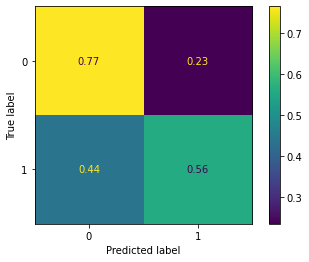

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_lr, X_test, y_test, normalize='true')

#O valor de `accuracy_score` representa o percentual de acerto do modelo treinado com base em regressão logística. Já a matriz de de confusão construída pela função `plot_confusion_matrix` apresenta valores mais detalhados de capacidade do modelo: 

# * Na diagonal principal, estão os valores conhecidos como **verdadeiro positivo** (casos positivos foram acertados) e **verdadeiro negativo** (casos negativos que foram acertados)
# * Na diagonal secundária, estão os valores conhecidos como **falso positivo** (valor dado pelo modelo como positivo, mas que na verdade é falso) e **falso negativo** (valor dado pelo modelo como negativo, mas que na verdade é positivo)

#O código numérico abaixo representa em forma de tabela o que acabou de ser discutido.

In [ ]:
table = pd.DataFrame(data=[y_test.array, y_pred]).T

table.columns = ['Test', 'Pred']

table['Result'] = ""
for i in table.index:
  if table.loc[i, 'Test'] == 1 and table.loc[i, 'Pred'] == 1: table.loc[i, 'Result'] = "True Positive"
  if table.loc[i, 'Test'] == 0 and table.loc[i, 'Pred'] == 0: table.loc[i, 'Result'] = "True Negative"

  if table.loc[i, 'Test'] == 0 and table.loc[i, 'Pred'] == 1: table.loc[i, 'Result'] = "False Positive"
  if table.loc[i, 'Test'] == 1 and table.loc[i, 'Pred'] == 0: table.loc[i, 'Result'] = "False Negative"

table

,Test,Pred,Result
0,0,0,True Negative
1,1,0,False Negative
2,0,0,True Negative
3,1,0,False Negative
4,0,1,False Positive
...,...,...,...
83,0,1,False Positive
84,1,0,False Negative
85,1,1,True Positive
86,1,1,True Positive


# Os parâmetros *precision* e *recall*, obtidos a partir de `sklearn.metrics.classification_report()`:
# * ***Precision***: Dentro de todas as classificações feitas como positivas, quantas de fato acertaram (*precision = true positive/(true positive + false positive)*)
# * ***Recall***: Dentro de todas os valores verdadeiramente positivos, quantos o modelo foi capaz de acertar (*recall = true positive/(true positive + false negative)*)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71        47
           1       0.68      0.56      0.61        41

    accuracy                           0.67        88
   macro avg       0.67      0.66      0.66        88
weighted avg       0.67      0.67      0.67        88



#Por fim, um dos parâmetros mais populares em *machine learning* chama-se *ROC* (*receiver operating characteristic*). Trata-se de um gráfico onde geralmente os parâmetros verdadeiro positivo e falso positivo são plotados em um gráfico variando o parâmetro de classificação utilizado no modelo. Para fins comparativos utiliza-se o parâmetro *ROC AUC* (*AUC: area under the curve*). Onde é calculada a área sobre a curve, estima-se que enquanto maior esse parâmetro, melhor o modelo de classificação.

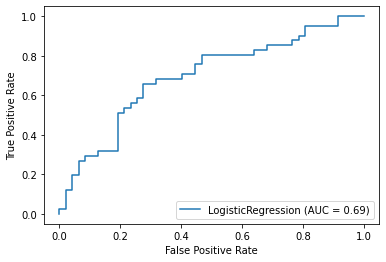

In [ ]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

#Plotagem de ROC
plot_roc_curve(model_lr, X_test, y_test)

In [ ]:
#Valor numérico de ROC_AUC
roc_auc_score(y_test, model_lr.predict_proba(X_test)[:,1])

0.6938245978204463

#A partir de agora, este trabalho utilizará o parâmetro *ROC AUC* para comparar diversos modelos de *machine learning*

#**Seção 2.2:**

#**Árvore de Decisão**

#Um dos modelos mais populares em *machine learning*. Trata-se de um modelo com baixo custo computacional e baseado em mecanismos empíricos. Uma discussão da modelagem matemática pode ser consultada em [5]

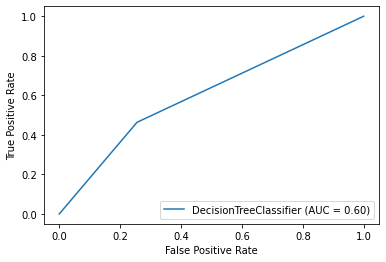

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop(['PATIENT_VISIT_IDENTIFIER', 'WINDOW', 'ICU', 'ICU_norm'], axis=1)
y = df['ICU_norm']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

plot_roc_curve(model_tree, X_test, y_test)

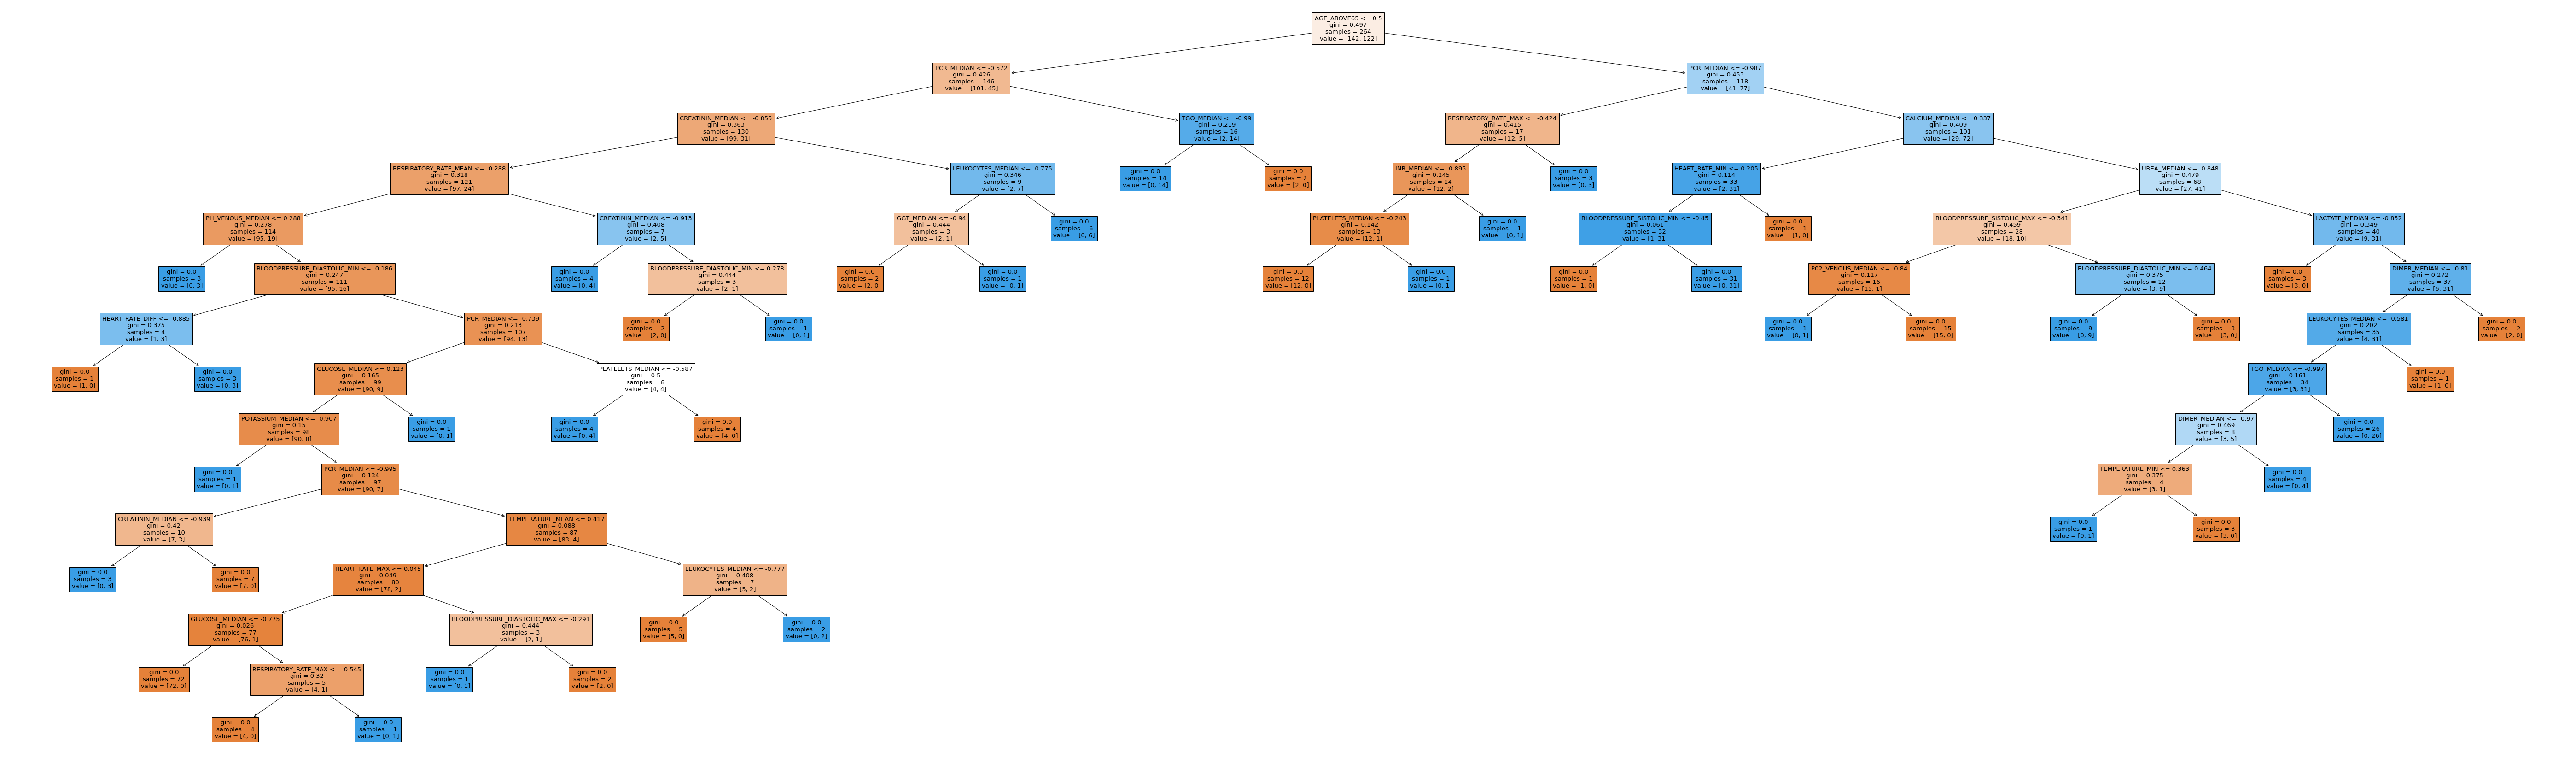

In [ ]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(100,30))
_ = plot_tree(model_tree, feature_names=X.columns, filled=True)

#**Seção 2.3:**

#**Redução dos efeitos de aleatoriedade**

#Um dos problemas dos modelos de regressão logística e árvore de decisão é o chute inicial para definição de parâmetros, eles costumam ser gerados randomicamente e portanto, o resultado final do modelo vai representar uma alta variabilidade a depender dos chutes iniciais.

#Para atacar o problema, pode-se criar funções que executam algoritimos de modelagem de forma iterada.

In [ ]:
def run_model_n_repeats(model, df, n):

  X = df.drop(['PATIENT_VISIT_IDENTIFIER', 'WINDOW', 'ICU', 'ICU_norm'], axis=1)
  y = df['ICU_norm']

  auc = []
  for _ in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.15)

    model.fit(X_train, y_train)
    auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

  auc_mean = np.mean(auc)
  auc_std = np.std(auc)

  print(f"Mean AUC: {auc_mean}")
  print(f"Confidence Interval: {auc_mean - 2*auc_std} - {auc_mean + 2*auc_std}")

In [ ]:
run_model_n_repeats(model_lr, df, 50)

Mean AUC: 0.768657142857143
Confidence Interval: 0.6494647447979461 - 0.8878495409163399


In [ ]:
run_model_n_repeats(model_tree, df, 50)

Mean AUC: 0.6467857142857143
Confidence Interval: 0.5463364175012679 - 0.7472350110701607


#Existem funções específicas da biblioteca `sklearn` que realizam o processo de **validação cruzada**, que executa as funções de modelagem de maneira iterada e além disso realizam a separação dos dados de treino e teste de forma randomizada, mas coordenada. Assim, são reduzidos efeitos indesejados como repetição de dados no processo de treino, a ausência de parte do *data frame* no mesmo processo, e até ocorrência de seleção de dados tendenciosos (ex: proporção exagerada de valores positivos no treino). Serão introduzidas as funções `sklearn.model_selection.cross_validate()` e `sklearn.model_selection.RepeatedStratifiedKFold()` como exemplo no algoritmo de modelagem.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

def run_model_cv(model, df, n_splits, n_repeats):

  X = df.drop(['PATIENT_VISIT_IDENTIFIER', 'WINDOW', 'ICU', 'ICU_norm'], axis=1)
  y = df['ICU_norm']

  metrics = cross_validate(model, X, y, cv=RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats), scoring='roc_auc')

  auc_mean = np.mean(metrics['test_score'])
  auc_std = np.std(metrics['test_score'])

  print(f"Mean AUC: {auc_mean}")
  print(f"Confidence Interval: {auc_mean - 2*auc_std} - {auc_mean + 2*auc_std}")



In [ ]:
run_model_cv(model_lr, df, 5, 10)

Mean AUC: 0.7642018379024959
Confidence Interval: 0.6600765175415305 - 0.8683271582634612


In [ ]:
run_model_cv(model_tree, df, 5, 10)

Mean AUC: 0.6287045239018922
Confidence Interval: 0.5335015923696848 - 0.7239074554340997


#**Seção 2.4:**

#**Hiperparâmetros**

#As funções de modelagem possui opções de configurações conhecido como hiperparâmetros, eles podem ser modificados para produzir modelos com mais acurácia, mas em contrapartida podem promover o problema da super otimização que geram modelos com alta acurácia com dados passados, mas ineficazes na sua utilização prática, isso porque estão altamente enviezados pelos dados exclusivos do *data frame* escolhido para o trabalho.

#Um exemplo de utilização de hiperparâmetros é o `max_depth` (profundidade máxima da árvore) do modelo `sklearn.tree.DecisionTreeClassifier`

In [ ]:
#A função run_models_cv() foi modificada para retornar os resultados de ROC AUC médios para os dados de treino e teste
def run_model_cv(model, df, n_splits, n_repeats):

  X = df.drop(['PATIENT_VISIT_IDENTIFIER', 'WINDOW', 'ICU', 'ICU_norm'], axis=1)
  y = df['ICU_norm']

  metrics = cross_validate(model, X, y, 
                           cv=RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats), 
                           scoring='roc_auc',
                           return_train_score=True)

  train_auc_mean = np.mean(metrics['train_score'])
  test_auc_mean = np.mean(metrics['test_score'])

  print(f"Mean train AUC: {train_auc_mean}. Mean test AUC: {test_auc_mean}")

  return train_auc_mean, test_auc_mean

#Gerar iteração variando os valores de max_depth entre 1 até 15
train_auc_mean_list = []
test_auc_mean_list = []
for i in range(1,15):
  model_tree = DecisionTreeClassifier(max_depth=i)
  train, test = run_model_cv(model_tree, df, 5, 10)
  train_auc_mean_list.append(train)
  test_auc_mean_list.append(test)

Mean train AUC: 0.6454026275469427. Mean test AUC: 0.5777065417690417
Mean train AUC: 0.7565021586063755. Mean test AUC: 0.6747704103625156
Mean train AUC: 0.8245888470912359. Mean test AUC: 0.6677569682421657
Mean train AUC: 0.8860389708093095. Mean test AUC: 0.6740404758825812
Mean train AUC: 0.9308527834238349. Mean test AUC: 0.6495272290831501
Mean train AUC: 0.9590486578029424. Mean test AUC: 0.6286498744557956
Mean train AUC: 0.974750771632575. Mean test AUC: 0.6080738124488125
Mean train AUC: 0.9844947200949588. Mean test AUC: 0.6020061142182853
Mean train AUC: 0.9902594522879784. Mean test AUC: 0.6068093721712142
Mean train AUC: 0.9950631456708038. Mean test AUC: 0.5974334090370275
Mean train AUC: 0.9976616401775555. Mean test AUC: 0.6116849998922367
Mean train AUC: 0.9992400689626306. Mean test AUC: 0.6209472323699297
Mean train AUC: 0.9998261736254906. Mean test AUC: 0.6375522786542523
Mean train AUC: 0.9998497625926978. Mean test AUC: 0.6427382241691453


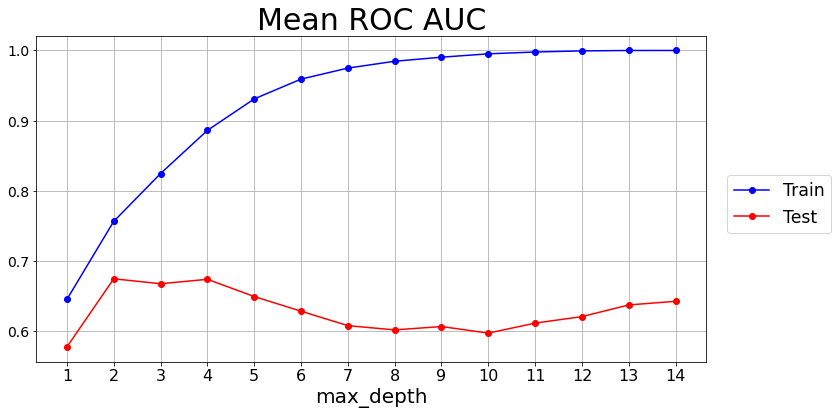

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.title("Mean ROC AUC", fontsize=30)
plt.xlabel("max_depth", fontsize=20)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=14)
plt.grid()
ax.set_axisbelow(True)

plt.locator_params(axis="x", nbins=15)

plt.plot(range(1,15), train_auc_mean_list, 'b', marker='o', label='Train')
plt.plot(range(1,15), test_auc_mean_list, 'r', marker='o', label='Test')

ax.legend(bbox_to_anchor=(1.20, 0.6), fontsize = 'xx-large')

#O gráfico acima ilustra o conceito de super otimização, enquanto maior a profundidade da árvore, aumenta-se o valor da acurácia para os dados de treino, chegando a valores quase máximos. O mesmo comportamento não é observado nos dados de teste, que chegam a um patamar de pico e na sequência decrescem, o que prova a ineficiência de modelos super otimizados.

#**Seção 2.5:**

#***Random Forest***

# O modelo de *Random Forest* consiste na construção de diversas árvores de decisão e a classificação se dará pelo resultado da maioria delas. Segue o gráfico ROC para um modelo sem iterações e na sequência uma iteração com validação cruzada.

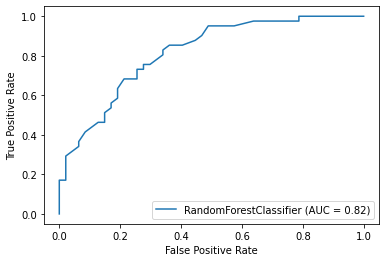

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['PATIENT_VISIT_IDENTIFIER', 'WINDOW', 'ICU', 'ICU_norm'], axis=1)
y = df['ICU_norm']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)

plot_roc_curve(model_forest, X_test, y_test)

In [ ]:
run_model_cv(model_forest, df, 5, 10)

Mean train AUC: 1.0. Mean test AUC: 0.8053622260118969


(1.0, 0.8053622260118969)

#Agora será explorado um dos principais hiperparâmetros do *random forest*, o `n_estimators` que define a quantidade de árvores a serem utilizadas no modelo.

In [ ]:
train_auc_mean_list = []
test_auc_mean_list = []
for i in range(1, 20):
  model_rf = RandomForestClassifier(n_estimators=i)
  train, test = run_model_cv(model_rf, df, 5, 10)
  train_auc_mean_list.append(train)
  test_auc_mean_list.append(test)

Mean train AUC: 0.8538282932421761. Mean test AUC: 0.5981239762489763
Mean train AUC: 0.9444269473917535. Mean test AUC: 0.6595256665157982
Mean train AUC: 0.9730756607217452. Mean test AUC: 0.6799499641687143
Mean train AUC: 0.9863097706321468. Mean test AUC: 0.6899984778438726
Mean train AUC: 0.9926691821753874. Mean test AUC: 0.7209645351092719
Mean train AUC: 0.9948929306779682. Mean test AUC: 0.7323618744342428
Mean train AUC: 0.9973076504782018. Mean test AUC: 0.7336421155006682
Mean train AUC: 0.9980721660788877. Mean test AUC: 0.7493554072912627
Mean train AUC: 0.9989567642967825. Mean test AUC: 0.7547637829216778
Mean train AUC: 0.999247330306328. Mean test AUC: 0.7483776038299065
Mean train AUC: 0.9995057082287895. Mean test AUC: 0.7594579170977197
Mean train AUC: 0.9997028407929173. Mean test AUC: 0.7597406003491529
Mean train AUC: 0.999812400440696. Mean test AUC: 0.7607145580089657
Mean train AUC: 0.9998289748198236. Mean test AUC: 0.7570599756455019
Mean train AUC: 0.9999

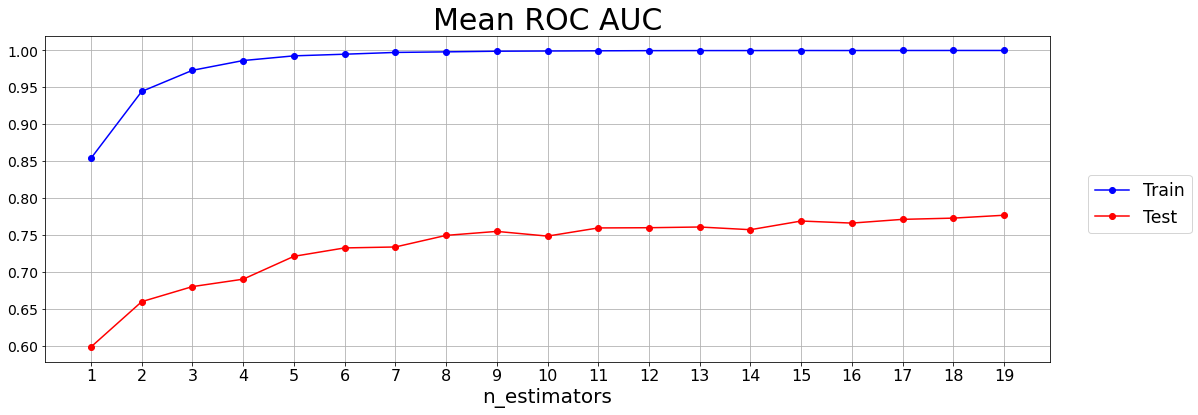

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))

plt.title("Mean ROC AUC", fontsize=30)
plt.xlabel("n_estimators", fontsize=20)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=14)
plt.grid()
ax.set_axisbelow(True)

x_axis = range(1, 20)
#plt.locator_params(axis="x", nbins=len(x_axis))
plt.xticks(x_axis)

plt.plot(x_axis, train_auc_mean_list, 'b', marker='o', label='Train')
plt.plot(x_axis, test_auc_mean_list, 'r', marker='o', label='Test')

ax.legend(bbox_to_anchor=(1.15, 0.6), fontsize = 'xx-large')

#Observa-se que o parâmetro de acurácia no teste não sofre decaimento ao aumentar o parâmetro `n_estimators`

#**Referências Bibliográficas**

#[3] https://www.scielo.br/j/csp/a/jyhKL6G4dZhcbchMD6bcS8s/?format=pdf&lang=pt
#[4] https://en.wikipedia.org/wiki/Logistic_regression
#[5] https://en.wikipedia.org/wiki/Decision_tree